## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python

%matplotlib inline
pd.set_option('display.max_columns', None)

C:\Users\djeny\AppData\Roaming\Python\Python313\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv(r"amz_uk_price_prediction_dataset.csv")

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               str    
 2   title              str    
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           str    
dtypes: bool(1), float64(2), int64(3), str(3)
memory usage: 495.8 MB


In [6]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

# Creat a numerical dataframe and a categorical data frame

In [7]:
cat.head()  #Check if everything is categorical

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers


In [8]:
num.head()  #Check if everything is numerical

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


In [9]:
# check for missing values

round(num.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1370545.345,816056.170,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.153,2.195,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,480.628,5944.124,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,89.244,345.609,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,25.897,240.484,0.0,0.00,0.00,0.00,50000.0


In [10]:
# min for this categories for the type of data need to be 0
# having 25% and 50% under 0, doens not look because, 50% of the people mark 0 for starts and reviews and boughtinlast month means that last mounth no one bought.
# have 75% of the stars under 4.40, reviews under 59, prices under 45.99, does not look expensive
# the range of prices is between 0 and 100,000

In [11]:
missing = df.isna().sum()
missing = missing[missing>0]
missing

Series([], dtype: int64)

In [12]:
# no missing values in our data set

In [13]:
# Check for duplicated rows:

num.duplicated().sum()

np.int64(0)

In [14]:
cat.duplicated().sum()

np.int64(0)

In [15]:
# Check for spaces (NaN):

spaces = df.eq(" ").sum()
spaces

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [16]:
# No empty spaces

In [17]:
frequency_table = cat.category.value_counts()

In [18]:
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

** Conclusion of the frequency table for the top 5 product of the category.**

- The most frequent product category is Sports & outdoors with 836265 sales, followed by Beauty with 19312 sales, Handmade Clothing, Shoes & Accessories with 19229 sales, Bath & Body with 19092 sales and the last one is the category Birthday Gifts with 18978 sales.

-----

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [19]:
cat["category"].describe()

count               2443651
unique                  296
top       Sports & Outdoors
freq                 836265
Name: category, dtype: object

In [20]:
proportion_table = cat.category.value_counts(normalize=True).round(2)

In [21]:
df2 = pd.concat([frequency_table,proportion_table], axis=1)
df2.columns = ["absolute_frequency_prod","relative_frequency_prod"]
df2

,absolute_frequency_prod,relative_frequency_prod
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
...,...,...
Motorbike Chassis,107,0.00
Alexa Built-In Devices,107,0.00
Plugs,107,0.00


C:\Users\djeny\AppData\Local\Temp\ipykernel_36276\2483794788.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y= "absolute_frequency_prod", data=df2, palette="Paired", legend = True)


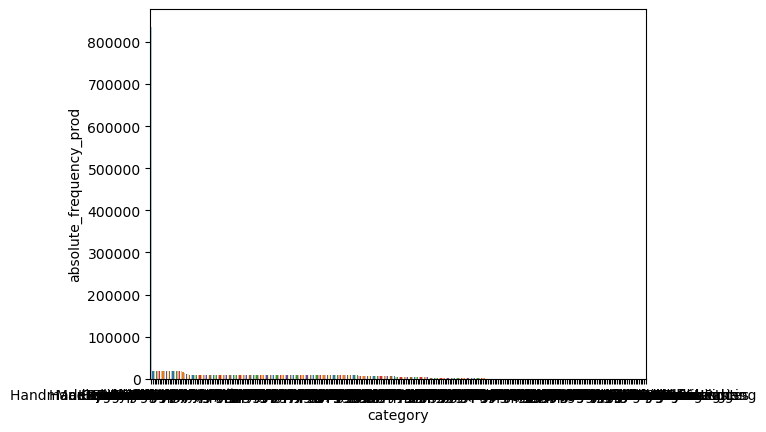

In [22]:
sns.barplot(x="category", y= "absolute_frequency_prod", data=df2, palette="Paired", legend = True)
plt.show()

In [23]:
df3_subset = df2.iloc[0:5]

In [24]:
df3_subset

,absolute_frequency_prod,relative_frequency_prod
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01


In [25]:
df4_subset = frequency_table.head(5)

In [26]:
df5_subset = frequency_table.iloc[0:5]

In [27]:
df5_subset

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [28]:
total_absolute = int(frequency_table.sum())
total_relative=int(proportion_table.sum())

C:\Users\djeny\AppData\Local\Temp\ipykernel_36276\2803895388.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y= "absolute_frequency_prod", data=df3_subset, palette="Paired", legend = True)


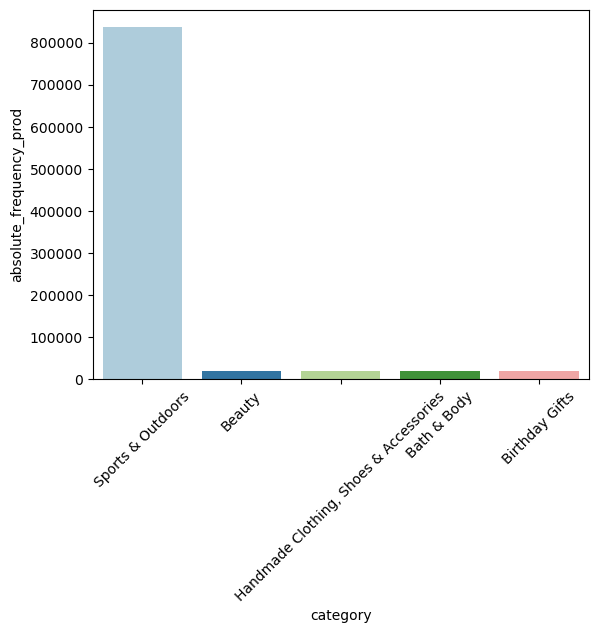

In [29]:
sns.barplot(x="category", y= "absolute_frequency_prod", data=df3_subset, palette="Paired", legend = True)
plt.xticks(rotation = 45)
plt.show()

In [30]:
df4_subset

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [31]:
# values for the legend

total =df4_subset.sum()
labels_legend = [f'{name}: {(value/total)*100:.1f}%' 
                 for name, value in zip(df4_subset.index, df4_subset)]

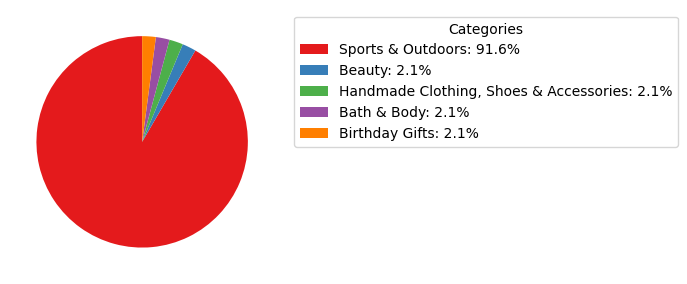

In [32]:
df4_subset.plot.pie(autopct=None ,
                    startangle=90, 
                    colors=sns.color_palette('Set1'), 
                    subplots=True, 
                    legend = False, 
                    labeldistance = None,
                    labels = None, 
                    ylabel='')
plt.legend(bbox_to_anchor =(1.05,1), 
           loc = "upper left", 
           labels = labels_legend, 
           title = "Categories")
plt.tight_layout()
plt.show()

**Conclusion of the distribution of the top 5 products**

- With the pie chart we can see the representation of the 5 top products in category. As is clearly represented the dominance belongs to Sports & Outdoors, occupying a more than 90% of the chart pie.
- With a very small ocupancy we have the products Handmade Clothing, Shoes & Accessories, Bath & Body, Birthday Gifts with a same percentage 2,1% each.
- What we can conclude from Amazon sales is that they have more sales for the sports & outdoors products significately that the incomes of the company depending on this products. 
- The other 4 products the share the same pie parts so they have lower impact on total revenue to Amazon. 

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [33]:
round(num["price"].mean(),2)

np.float64(89.24)

In [34]:
round(num["price"].median(),3)

19.09

In [35]:
round(num["price"].mode(),3)

0    9.99
Name: price, dtype: float64

**Conclusion**

- Having the mean bigger than the median indicates a right-skewed distribution. 
- The majority of products are relatively low-priced, while a small number of high-priced items significantly increase the average.
- As a result, the mode and median represent the typical product price better than the mean.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [36]:
round(num["price"].std(),2)

345.61

In [37]:
round(num["price"].var(),2)

119445.49

In [38]:
round(num.describe()["price"],2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [39]:
range = num["price"].max()-num["price"].min()
range

100000.0

In [40]:
Q1 = 9.99
Q3 = 45.99
IQR = Q3 - Q1
IQR

36.0

**Conclusion**

- The product prices are highly varied, indicating a significant spread. 
- The standard deviation is large relative to the median price, suggesting that while most products are low-priced, a few high-priced items pull the average up. 
- The range is extremely wide, confirming the presence of extreme values (outliers). 
- However, the interquartile range is much smaller than the full range, showing that the middle 50% of prices are more tightly clustered. 
- These metrics together confirm the right-skewed distribution indicated before, and also a wide spread in prices due to a few very expensive products.

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

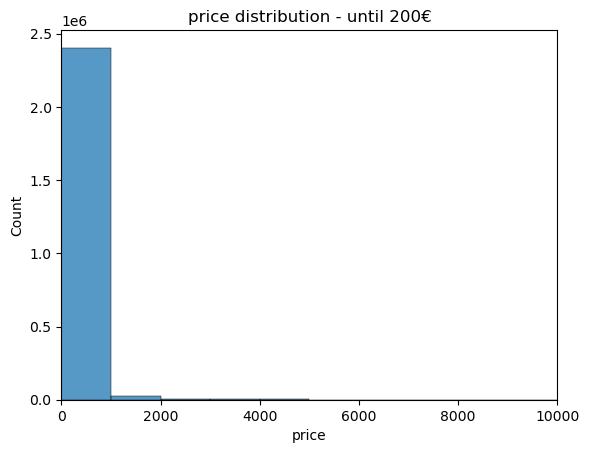

In [41]:
sns.histplot(num.price, bins=100, kde=False)
plt.xlim(0,10000)
plt.title("price distribution - until 200€")
plt.show()

**Barplot Conclusion**

- Due to the fact that there are some products with a hig cost (the max was 100000) the histogram doesn't show the data of most of the products. 

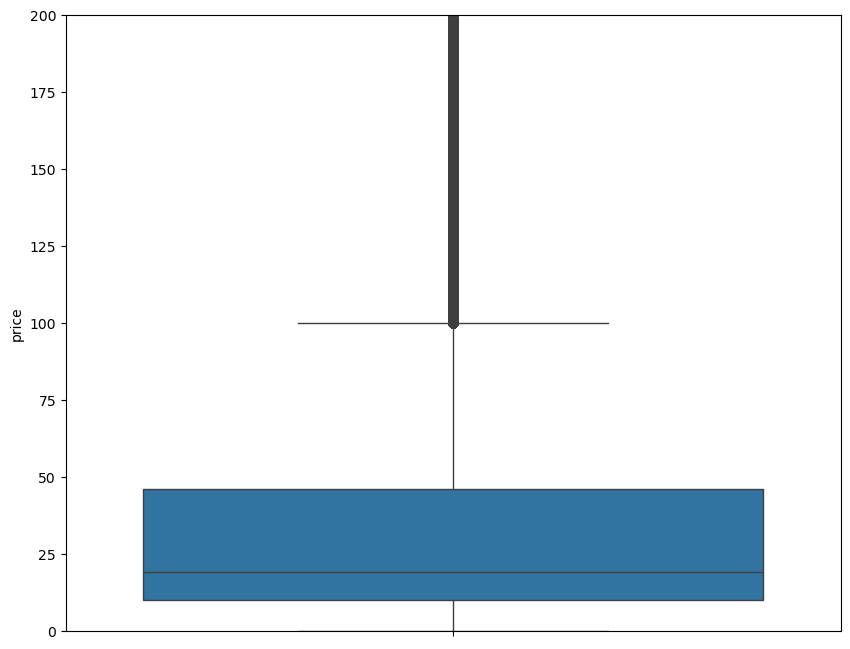

In [42]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y="price")
plt.ylim(0, 200)
plt.show()

**Conclusion**

- The box is concentrated at low prices, showing that most products are inexpensive.
- The median is low, confirming that typical prices are cheap.
- There are many points far to the right, which are high-price outliers.
- This clearly indicates a strong right skew in product prices.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

We're going to make the calculations without taking into account the products that have 0 reviews (this way we can consider 0 stars as a valid rating if there is at least 1 review)

In [43]:
stars_no_00 = num[num['stars']> 0]
stars_no_00

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443642,2828585,3.6,66,49.99,0
2443643,2828586,4.1,5,158.99,0
2443644,2828587,3.6,12,14.99,0
2443649,2828592,4.3,404,79.99,0


In [44]:
round(stars_no_00["stars"].mean(),2)

np.float64(4.32)

In [45]:
round(stars_no_00["stars"].median(),2)

4.4

In [46]:
round(stars_no_00["stars"].mode(),2)

0    4.5
Name: stars, dtype: float64

**Conclusion**

- Customers generally rate products positively. 
- Most ratings are clustered between 4 and 5, with the most common rating being 4.5. 
- This indicates a clear trend towards high satisfaction among users.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [47]:
round(stars_no_00["stars"].var(),2)

0.31

In [48]:
round(stars_no_00["stars"].describe(),2)

count    1218010.00
mean           4.32
std            0.56
min            1.00
25%            4.10
50%            4.40
75%            4.60
max            5.00
Name: stars, dtype: float64

In [49]:
range = stars_no_00["stars"].max() - stars_no_00["stars"].min()
range

4.0

In [50]:
Q1 = 4.10
Q3 = 4.60
IQR = Q3 - Q1
IQR

0.5

**Conclusion**

- Customer ratings are generally consistent. Most ratings are clustered around the mean, with a narrow interquartile range of 0.5, indicating that users tend to give similar feedback.
- Although the full range is 4 points, the data shows low variability in ratings.

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [51]:
Skewness = round(stars_no_00["stars"].skew(),2)
Skewness

np.float64(-2.38)

In [52]:
kurt = round(stars_no_00["stars"].kurtosis(),2)
kurt

np.float64(9.78)

**Conclusion**

- Customer ratings are strongly skewed toward high values, with most products receiving ratings close to 4–5.
- Users tend to rate products very positively, and negative feedback is rare.

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

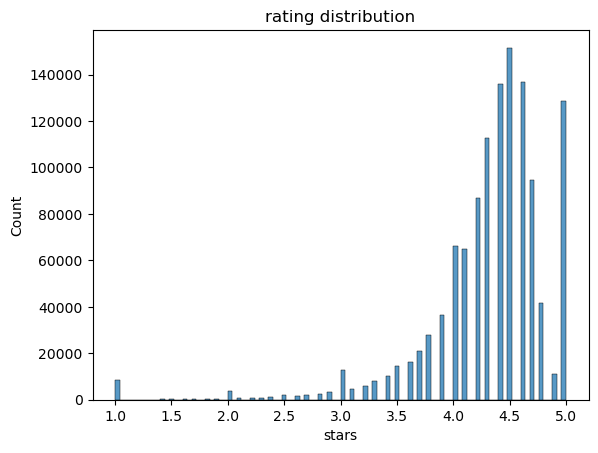

In [53]:
sns.histplot(data = stars_no_00, x="stars", bins=100, kde=False)
plt.title("rating distribution")
plt.show()

**Conclusion**

- With this histogram (where there are no outliners with low ratings) we can confirm that most of the ratings are between 4 and 5, and the most common is 4.5, which is the one indicated by the mode. 
- And therefore, the satisfaction of the customers is very high.
